In [50]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay, classification_report


In [4]:
df = pd.read_csv("../data/train_processed.csv")
print(df.shape)
df.head()

(26570, 38)


,attribute_0_material_5,attribute_0_material_7,attribute_1_material_5,attribute_1_material_6,attribute_1_material_8,attribute_2_5,attribute_2_6,attribute_2_8,attribute_2_9,attribute_3_5,attribute_3_6,attribute_3_8,attribute_3_9,product_code_A,product_code_B,product_code_C,product_code_D,product_code_E,loading,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,80.10,7,8,4,18.040,12.518,15.748,19.292,11.739,20.155,10.672,15.859,17.594,15.193,15.029,15.755,13.034,14.684,764.100,0
1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,84.89,14,3,3,18.213,11.540,17.717,17.893,12.748,17.889,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,82.43,12,1,5,18.057,11.652,16.738,18.240,12.718,18.288,12.715,15.607,20.247,13.798,16.711,18.631,14.094,17.946,663.376,0
3,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,101.07,13,2,6,17.295,11.188,18.576,18.339,12.583,19.060,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,188.06,9,2,8,19.346,12.950,16.990,15.746,11.306,18.093,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


In [5]:
df["failure"].value_counts()
# imbalanced? should we do something about this for training? hmmm 
# revisit later

0    20921
1     5649
Name: failure, dtype: int64

In [35]:
X = df.drop("failure", axis=1)
y = df["failure"]

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=69)
# statified default is none and thus maintains class balance in the split

In [59]:
# sense check w shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

y_test.value_counts()


(18599, 37)
(18599,)
(7971, 37)
(7971,)


0    6290
1    1681
Name: failure, dtype: int64

In [37]:
# check for similar class balance
print("train class balance:", "{:.3f}".format(y_train.value_counts()[1]/y_train.shape[0]))
print("test class balance:", "{:.3f}".format(y_test.value_counts()[1]/y_test.shape[0]))
# seems still balanced


train class balance: 0.213
test class balance: 0.211


In [41]:
clf = LogisticRegression(random_state=420, max_iter=1000)
clf.fit(X_train,y_train)

# this is just accuracy score
clf.score(X_test, y_test)

0.7891105256555012

In [43]:
y_prob = clf.predict_proba(X_test)
y_prob

array([[0.85093086, 0.14906914],
       [0.7498316 , 0.2501684 ],
       [0.83770259, 0.16229741],
       ...,
       [0.78163583, 0.21836417],
       [0.7302366 , 0.2697634 ],
       [0.77974562, 0.22025438]])

In [49]:
print(y_prob.shape)
#y_prob[:, 1]
roc_auc_score(y_test, y_prob[:,1])

(7971, 2)


0.5900422660824383

In [51]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      6290
           1       0.50      0.00      0.01      1681

    accuracy                           0.79      7971
   macro avg       0.64      0.50      0.44      7971
weighted avg       0.73      0.79      0.70      7971



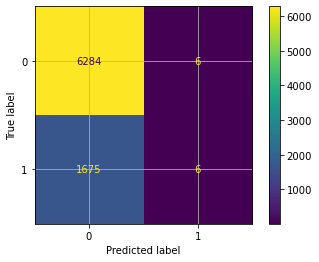

In [52]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='.5g')
print(classification_report(y_test, y_pred))
plt.grid(visible=None)
plt.show()

In [53]:
from pycaret.classification import *
s = setup(data=df, target="failure", n_jobs=-1)

,Description,Value
0,session_id,3440
1,Target,failure
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(26570, 38)"
5,Missing Values,False
6,Numeric Features,19
7,Categorical Features,18
8,Ordinal Features,False
9,High Cardinality Features,False


In [54]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7857,0.0000,0.0003,0.1000,0.0005,0.0003,0.0032,0.0320
dummy,Dummy Classifier,0.7857,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0270
lda,Linear Discriminant Analysis,0.7856,0.5820,0.0033,0.3567,0.0065,0.0035,0.0199,0.0400
et,Extra Trees Classifier,0.7856,0.5518,0.0005,0.1500,0.0010,0.0002,0.0026,0.5210
lr,Logistic Regression,0.7855,0.5811,0.0015,0.3067,0.0030,0.0013,0.0106,1.7330
rf,Random Forest Classifier,0.7854,0.5480,0.0005,0.1500,0.0010,-0.0001,-0.0010,1.1860
gbc,Gradient Boosting Classifier,0.7845,0.5711,0.0018,0.2375,0.0035,-0.0005,-0.0001,1.3170
svm,SVM - Linear Kernel,0.7844,0.0000,0.0078,0.1029,0.0131,0.0057,0.0100,0.1920
ada,Ada Boost Classifier,0.7844,0.5621,0.0025,0.2265,0.0049,0.0003,0.0027,0.3210
lightgbm,Light Gradient Boosting Machine,0.7840,0.5564,0.0028,0.2154,0.0054,-0.0003,-0.0006,0.1090


In [55]:
log_reg = create_model("lr")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7855,0.5836,0.0000,0.0000,0.0000,-0.0011,-0.0121
1,0.7844,0.5766,0.0000,0.0000,0.0000,-0.0032,-0.0210
2,0.7860,0.5704,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7855,0.5982,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7860,0.5708,0.0050,0.6667,0.0100,0.0068,0.0443
5,0.7844,0.5790,0.0000,0.0000,0.0000,-0.0021,-0.0171
6,0.7860,0.6022,0.0025,1.0000,0.0050,0.0039,0.0444
7,0.7855,0.5618,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7864,0.5799,0.0025,1.0000,0.0050,0.0039,0.0444


In [58]:
log_reg_tuned = tune_model(log_reg, optimize="AUC", n_iter=100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5849,0.5843,0.4874,0.2546,0.3345,0.0742,0.0825
1,0.5839,0.5810,0.4975,0.2565,0.3385,0.0782,0.0873
2,0.5715,0.5698,0.4925,0.2478,0.3297,0.0629,0.0709
3,0.6011,0.6011,0.5238,0.2746,0.3603,0.1098,0.1219
4,0.5914,0.5701,0.4787,0.2571,0.3345,0.0768,0.0845
5,0.5866,0.5812,0.5238,0.2652,0.3521,0.0941,0.1059
6,0.5887,0.6026,0.5414,0.2707,0.3609,0.1049,0.1186
7,0.5780,0.5641,0.4737,0.2474,0.3250,0.0601,0.0668
8,0.5890,0.5807,0.5402,0.2701,0.3601,0.1045,0.1182
